In [1]:
import numpy as np
import pandas as pd
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
#matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
matplotlib.rc('text', usetex=False)
matplotlib.rcParams['axes.unicode_minus'] = False
#Test edit

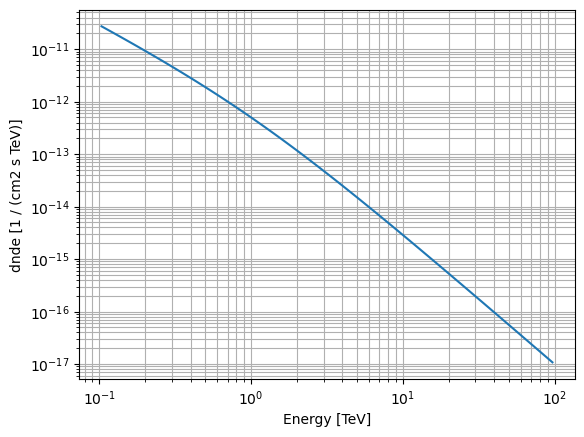

In [2]:
#Example of a power law
from astropy import units as u
import matplotlib.pyplot as plt
from gammapy.modeling.models import Models, SkyModel, SmoothBrokenPowerLawSpectralModel

energy_range = [0.1, 100] * u.TeV
model = SmoothBrokenPowerLawSpectralModel(
    index1=1.5,
    index2=2.5,
    amplitude="1e-12 TeV-1 cm-2 s-1",
    ebreak="1 TeV",
    reference="1 TeV",
    beta=1,
)
model.plot(energy_range)
plt.grid(which="both")

In [3]:
from scipy.optimize import curve_fit
def func(E, A, ENERGY_0, GAMMA_0,ENERGY_B,GAMMA_1,BETA):
    return A * (E/ENERGY_0)**(-GAMMA_0) *(1+(E/ENERGY_B)**((GAMMA_1-GAMMA_0)/BETA))**(-BETA)

[2.91576420e-08 2.01500278e-08 1.79224911e-08 1.01480730e-08
 8.35721535e-09 5.74533859e-09 3.30189568e-09 2.33169178e-09
 1.78316563e-09 1.28907072e-09 8.53730876e-10 5.65461987e-10
 3.33007156e-10 2.68590162e-10 1.82342492e-10 9.39539581e-11
 7.95547985e-11 5.35126335e-11 3.42571065e-11 2.14316827e-11
 1.47869536e-11 7.04535621e-12 4.44181698e-12 2.88061761e-12
 1.56499867e-12 1.02151643e-12 5.65552167e-13 3.13831421e-13
 1.42673440e-13 1.04913046e-13 6.27019176e-14 4.27764485e-14
 1.92869310e-14 1.15765866e-14 7.22208529e-15 3.68162503e-15
 2.45301210e-15 9.88641076e-16 5.85893410e-16 3.51276691e-16
 1.92451385e-16 9.69257280e-17 5.64981418e-17 4.09144816e-17
 1.87929718e-17 1.08819672e-17 5.97826146e-18 2.60203754e-18
 1.86639120e-18 1.02204207e-18]


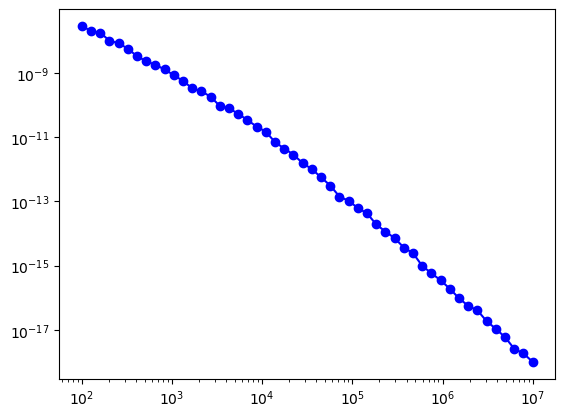

In [4]:
xdata = np.logspace(2, 7, 50)
y = func(xdata, 10**-9,10**3, 1.5, 10**4,2.5,1)
np.random.seed(1729)
#need amplitude based on the flux at that energy
y_noise = 0.1 *y* np.random.normal(size=xdata.size)
ydata = y + y_noise
print(ydata)
plt.plot(xdata, ydata, 'b-o', label='data')
plt.yscale("log")
plt.xscale("log")
plt.show()

In [5]:
bounds=[[10**-10,10**-8],[10**2,10**4],[0,3],[10**3,10**5],[0,5],[0,2]]
popt, pcov = curve_fit(func, xdata, ydata,[10**-9,10**3, 1.5, 10**4,2.5,1],bounds=(0,[10**-8,10**4,3,10**5,5,2]))
popt

array([1.0e-09, 1.0e+03, 1.5e+00, 1.0e+04, 2.5e+00, 1.0e+00])

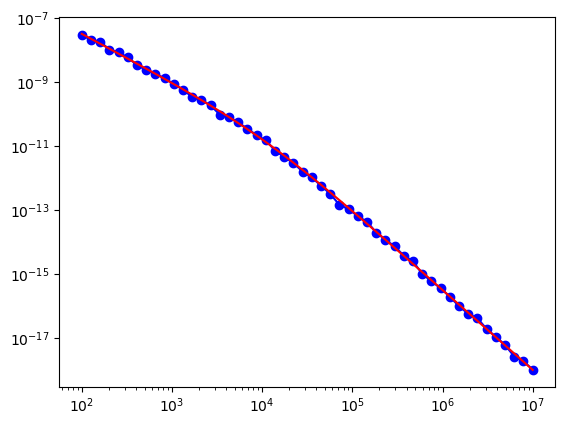

In [6]:
plt.plot(xdata, ydata, 'b-o', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-',label='fit')
plt.yscale("log")
plt.xscale("log")
plt.show()

In [7]:
pcov
stdevs = np.sqrt(np.diag(pcov))
res = ydata - func(xdata, *popt)


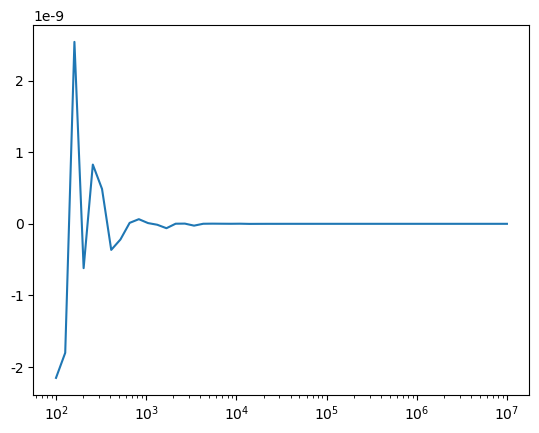

In [8]:
plt.plot(xdata,res)
plt.xscale("log")
plt.show()

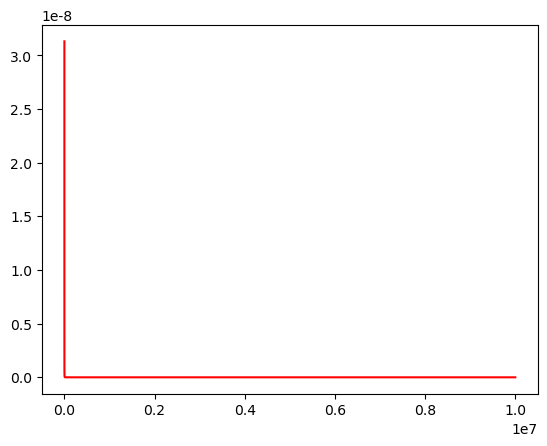

In [23]:
plt.plot(xdata, func(xdata, *popt), 'r-',
         label= 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f' % tuple(popt))

In [ ]:
# load in csv of boron flux
ams_boron=pd.read_csv('Boron_flux_ams.csv')
ams_boron.head()

In [ ]:
#join low and high together as one array to be used as x error bars
ams_boron_energy=np.array((ams_boron.Rlow.values,ams_boron.Rhigh.values.T))
#ams_boron_energy=ams_boron_energy*1000 # to convert to MV
ams_boron_energy_mp=(ams_boron_energy[0,:]+ams_boron_energy[1,:])/2.0 # find the midpoint between high and low
# now make the error bar sizes (symmetric about these midpoints)
ams_boron_energy_binsize=(ams_boron_energy[1,:]-ams_boron_energy[0,:])/2.0 # find the sizes of the bins
# calc the factor to multiply 10**(factor)
#make the flux an array
ams_boron_flux=np.array(ams_boron.flux_boron.values * 10**(ams_boron.factor.values.astype('float')))
ams_boron_flux

In [ ]:
ams_boron_sys_errors=np.array(ams_boron.sig_sys.values * 10**(ams_boron.factor.values.astype('float')))
ams_boron_stat_errors=np.array(ams_boron.sig_stat.values * 10**(ams_boron.factor.values.astype('float')))
ams_boron_errors=np.sqrt(np.square(ams_boron_stat_errors)+np.square(ams_boron_sys_errors))
print(ams_boron_errors)
ams_boron_energy[1,2]
ams_boron_energy_mp[25]

In [ ]:
fnt=20
x1=10**2
x2=10**7
y1=0
y2=0.34
plt.figure(figsize=(12,12))
plt.errorbar(ams_boron_energy_mp,ams_boron_flux,xerr=ams_boron_energy_binsize,yerr=ams_boron_errors,fmt='o',label="AMS")
plt.plot(ams_boron_energy_mp,func_rigidity(ams_boron_energy_mp, *popt),'r-',label='fit')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Rigidity "r'$GV$',fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Flux "r'$\frac{1}{m^{2} s sr GV}$',fontsize=fnt)
plt.yticks(fontsize=fnt-4)
#plt.xlim([x1,x2])
#plt.ylim([y1,y2])
plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example, Boron", fontsize=fnt)
plt.savefig("Boron_flux_ams_data.png")
plt.show()

In [ ]:
# E_kin/nuc = (E-m*c^2)/Nnuc=(gamma*m*c^2-m*c^2)/Nnuc
# Rigidity=p/Ze -> beta*gamma*m*c^2/Ze
#primary lithium paper
# A*(R/R0)**(-GAMMA0)*(1+(R/R0)**((GAMMA0-GAMMA1)/S0))**(S0)*(1+(R/R1)**((GAMMA1-GAMMA2)/S1))**(S1)*(1+(R/R2)**((GAMMA2-GAMMA3)/S2))**(S2)
def func_rigidity(R,A,R0,GAMMA0,S0,R1,GAMMA1,S1,R2,GAMMA2,S2,GAMMA3):
    return A*(R/R0)**(-GAMMA0)*(1+(R/R0)**((GAMMA0-GAMMA1)/S0))**(S0)*(1+(R/R1)**((GAMMA1-GAMMA2)/S1))**(S1)*(1+(R/R2)**((GAMMA2-GAMMA3)/S2))**(S2)

In [ ]:
#best guess
#[10**-1,1, 2.25,0.20,10.0,2.0,0.25,350,2.5,0.16,2.20]
#bounds=([0,0,0,-1,0,0,-1,0,0,-1,0],[10**0,2,3,1,20,3,1,1000,3,1,3])
popt, pcov = curve_fit(func_rigidity, ams_boron_energy_mp,ams_boron_flux,[10**-1,1, 2.25,0.20,10.0,2.0,0.25,350,2.5,0.16,2.20],bounds=([0,0,0,-1,0,0,-1,0,0,-1,0],[10**0,2,3,1,20,3,1,1000,3,1,3]))
popt

In [ ]:
# Load library to help read in a type of data file that Astronomers sometimes used. FITS file
from astropy.io import fits
#name of the file on the comp
image_file2= "nuclei_full_56_ex2"


In [ ]:
#open the fits file with the name declared and then print the info in the fits file
hdu_list2 = fits.open(image_file2)
hdu_list2.info()

In [ ]:
# get some specific info about the fits file by accessing the fits file header 
hdr=hdu_list2[0].header
hdr


In [ ]:
# get the data from the fits file and assign it to the variable
#another way to do this without opening the header is to do image_data2 = fits.getdata(image_file2)
image_data2 = hdu_list2[0].data
#print some info about the variable holding the data
print(type(image_data2))
print(image_data2.shape)
#also, close the header since we printed it off for looking at
hdu_list2.close()

In [ ]:
# The data here is a multi-dimensional array where each value that is accessed is an amount of flux.
# Each element of the array is one of the axes that was described in the header. 
# Accessing a flux value is done via image_data2[a,b,c,d] where the first element, a, is the element-isotope to access
# b is the energy value, c is the z-value (height), and d is the radius.
len(image_data2[:,0,0,0]) #access all elements at the zeroth energy scale, zmin, ymin, and xmin [(element),(energy),(z),(r)]

In [ ]:
len(image_data4[:,0,0,0,0]) #access all elements at the zeroth energy scale, zmin, ymin, and xmin [element,energy,z, y,x]

In [ ]:
#log10(E/MeV) = CRVAL3 + k * CDELT3 need to add in 100 MeV if passing the energy values to start at 0.
#just writes the energy back to the same array it was given.
#flux (MeV/nucleon)2 cm−2sr−1s−1(MeV/nucleon)−1
# flux becomes MeV/nucleon /cm**2 /sr /s 
def undo_log_energy(energy):
    i=0
    while i<len(energy):
        energy[i]=10**(energy[i]+2)
        i+=1
def undo_log_flux(flux_vals):
    i=0
    while i<len(flux_vals):
        flux_vals[i]=

In [ ]:
energy=np.arange(0,7,0.304347391792257)
undo_log_energy(energy)

In [ ]:
#these are at the position of earth we expect.
x_loc=24
y_loc=22
z_loc=40 #40th for the highest halo size of 4, 30th for halo size of 3
be_10_be_9_2=np.divide(image_data2[16,:,20,y_loc,x_loc],image_data2[15,:,20,y_loc,x_loc])
be_10_be_9_3=np.divide(image_data3[16,:,30,y_loc,x_loc],image_data3[15,:,30,y_loc,x_loc])
be_10_be_9_4=np.divide(image_data4[16,:,40,y_loc,x_loc],image_data4[15,:,40,y_loc,x_loc])
be_10_be_9_5=np.divide(image_data5[16,:,50,y_loc,x_loc],image_data5[15,:,50,y_loc,x_loc])


In [ ]:
#make helium 3-4 ratio at earth
he_3_4_2=np.divide(image_data2[10,:,20,y_loc,x_loc],image_data2[11,:,20,y_loc,x_loc])
he_3_4_3=np.divide(image_data3[10,:,30,y_loc,x_loc],image_data3[11,:,30,y_loc,x_loc])
he_3_4_4=np.divide(image_data4[10,:,40,y_loc,x_loc],image_data4[11,:,40,y_loc,x_loc])
he_3_4_5=np.divide(image_data5[10,:,50,y_loc,x_loc],image_data5[11,:,50,y_loc,x_loc])

In [ ]:
fnt=20
x1=10**2
x2=10**5
plt.figure(figsize=(12,12))
plt.plot(energy,be_10_be_9_2,'-o',label="L=2")
plt.plot(energy,be_10_be_9_3,'-o',label="L=3")
plt.plot(energy,be_10_be_9_4,'-o',label="L=4")
plt.plot(energy,be_10_be_9_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Flux division Be-10/Be-9",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example, Beryllium", fontsize=fnt)
plt.savefig("be_ratio_multiple.png")
plt.show()

In [ ]:
fnt=20
x1=10**2
x2=10**7
plt.figure(figsize=(12,12))
plt.plot(energy,he_3_4_2,'-o',label="L=2")
plt.plot(energy,he_3_4_3,'-o',label="L=3")
plt.plot(energy,he_3_4_4,'-o',label="L=4")
plt.plot(energy,he_3_4_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Flux division He-3/He-4",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example, Helium", fontsize=fnt)
plt.savefig("He_ratio_multiple.png")
plt.show()

In [ ]:
#make more isotope ratios here, store as arrays?
Li_7_Li_6_2=np.divide(image_data2[13,:,20,y_loc,x_loc],image_data2[12,:,20,y_loc,x_loc])
Li_7_Li_6_3=np.divide(image_data3[13,:,20,y_loc,x_loc],image_data3[12,:,20,y_loc,x_loc])
Li_7_Li_6_4=np.divide(image_data4[13,:,20,y_loc,x_loc],image_data4[12,:,20,y_loc,x_loc])
Ne_22_Ne_20_2=np.divide(image_data2[29,:,20,y_loc,x_loc],image_data2[27,:,20,y_loc,x_loc])
Ne_22_Ne_20_3=np.divide(image_data3[29,:,20,y_loc,x_loc],image_data3[27,:,20,y_loc,x_loc])
Ne_22_Ne_20_4=np.divide(image_data4[29,:,20,y_loc,x_loc],image_data4[27,:,20,y_loc,x_loc])

fnt=20
y1=0.6
y2=1.1
x1=10**2
x2=10**5
fig,ax=plt.subplots(figsize=(12, 18), dpi=400, nrows=3,sharex=True)
fig.subplots_adjust(hspace=0)
ax[0].plot(energy,Li_7_Li_6_2,'-o',label="L=2")
ax[0].plot(energy,Li_7_Li_6_3,'-o',label="L=3")
ax[0].plot(energy,Li_7_Li_6_4,'-o',label="L=4")
ax[0].legend(loc='lower right',fontsize=fnt)
ax[0].set_xscale("log")
ax[0].set_ylabel("Flux division Li-7/Li-6",fontsize=fnt)
ax[0].set_ylim([y1,y2])
ax[0].tick_params(labelsize=fnt)
# beryllium
ax[1].plot(energy,be_10_be_9_2,'-o')
ax[1].plot(energy,be_10_be_9_3,'-o')
ax[1].plot(energy,be_10_be_9_4,'-o')
ax[1].set_xscale("log")
ax[1].set_ylabel("Flux division Be-10/Be-9",fontsize=fnt)
ax[1].set_ylim([0,0.6])
ax[1].tick_params(labelsize=fnt)
# Neon
ax[2].plot(energy,Ne_22_Ne_20_2,'-o')
ax[2].plot(energy,Ne_22_Ne_20_3,'-o')
ax[2].plot(energy,Ne_22_Ne_20_4,'-o')
ax[2].set_xscale("log")
ax[2].set_ylabel("Flux division Ne-22/Ne-20",fontsize=fnt)
ax[2].set_xlabel("Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
ax[2].tick_params(labelsize=fnt)
ax[2].set_ylim([0.1,0.75])
plt.xlim([x1,x2])
plt.savefig("isotopes_ratio_multiple.png")
plt.show()

In [ ]:
#nitrogen?

In [ ]:
# can i get a map of the normalized flux per particle across the plane of the galaxy?
#first make grid of the galaxy
x_kpc=np.arange(-14,14,0.903224903225806)
y_kpc=np.linspace(-14,14,29, endpoint=True)
z_kpc2=np.linspace(-2,2,41, endpoint=True)
z_kpc3=np.linspace(-3,3,61, endpoint=True)
z_kpc4=np.linspace(-4,4,81, endpoint=True)
X,Y=np.meshgrid(x_kpc,y_kpc)
print(y_kpc)
# now make the normalized flux for a given energy
norms=np.divide(image_data2[16,2,20,:,:],image_data2[15,2,20,:,:])
#norms = norms[np.logical_not(np.isnan(norms))]

print(norms.shape)
print(norms[:,10])

In [ ]:
# plotting the 3d full output on xy (plane of galaxy) at z of 0.
#need to make an array thats (x,y,mag) where mag is normalized. 
#plt.imshow((X,Y), cmap='gray')
plt.pcolormesh(X, Y, norms, vmin=0,vmax=0.25,cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")
plt.title("Be-10/Be-9 low E")
plt.savefig("proof_of_concept.png")
plt.show()

In [ ]:
#now for x,z at same energy.
X,Z=np.meshgrid(x_kpc,z_kpc2)
print(z_kpc2)
# now make the normalized flux for a given energy
norms_xz=np.divide(image_data2[16,2,:,10,:],image_data2[15,2,:,10,:])
print(norms_xz.shape)
print(norms_xz[:,10])
plt.pcolormesh(X, Z, norms_xz, cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.title("Be-10/Be-9 low E")
plt.savefig("proof_of_concept_xz.png")
plt.show()

In [ ]:
# can i get a map of the normalized flux per particle across the plane of the galaxy?
#first make grid of the galaxy
X,Y=np.meshgrid(x_kpc,y_kpc)
print(y_kpc)
# now make the normalized flux for a given energy
norms=np.divide(image_data2[16,12,20,:,:],image_data2[15,12,20,:,:])
print(norms.shape)
print(norms[:,10])
# plotting the 3d full output on xy (plane of galaxy) at z of 0.
#need to make an array thats (x,y,mag) where mag is normalized. 
#plt.imshow((X,Y), cmap='gray')
plt.pcolormesh(X, Y, norms,vmin=0.5,vmax=0.6, cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.title("Be-10/Be-9 med E")
plt.savefig("proof_of_concept_med.png")
plt.show()

In [ ]:
#now for x,z at same energy.
x_kpc=np.arange(-10,10,0.869564347826087)
z_kpc=np.linspace(-2,2,41, endpoint=True)
X,Z=np.meshgrid(x_kpc,z_kpc)
print(z_kpc)
# now make the normalized flux for a given energy
norms_xz=np.divide(image_data5[16,12,:,10,:],image_data5[15,12,:,10,:])
print(norms_xz.shape)
print(norms_xz[:,10])
plt.pcolormesh(X, Z, norms_xz, cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.title("Be-10/Be-9 med E")
plt.savefig("proof_of_concept_med_xz.png")
plt.show()

In [ ]:
# can i get a map of the normalized flux per particle across the plane of the galaxy?
#first make grid of the galaxy
x_kpc=np.arange(-10,10,0.869564347826087)
y_kpc=np.linspace(-10,10,21, endpoint=True)
X,Y=np.meshgrid(x_kpc,y_kpc)
print(y_kpc)
# now make the normalized flux for a given energy
norms=np.divide(image_data5[16,22,20,:,:],image_data5[15,22,20,:,:])
print(norms.shape)
print(norms[:,10])
# plotting the 3d full output on xy (plane of galaxy) at z of 0.
#need to make an array thats (x,y,mag) where mag is normalized. 
#plt.imshow((X,Y), cmap='gray')
plt.pcolormesh(X, Y, norms, cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.title("Be-10/Be-9 high E")
plt.savefig("proof_of_concept_high.png")
plt.show()#now for x,z at same energy.
x_kpc=np.arange(-10,10,0.869564347826087)
z_kpc=np.linspace(-2,2,41, endpoint=True)
X,Z=np.meshgrid(x_kpc,z_kpc)
print(z_kpc)
# now make the normalized flux for a given energy
norms_xz=np.divide(image_data5[16,22,:,10,:],image_data5[15,22,:,10,:])
print(norms_xz.shape)
print(norms_xz[:,10])
plt.pcolormesh(X, Z, norms_xz, cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.title("Be-10/Be-9 high E")
plt.savefig("proof_of_concept_high_xz.png")
plt.show()

In [ ]:
#read in the ams data on helium
ams=pd.read_csv('he_3_4_ams_data.csv')
ams.head()
#join low and high together as one array to be used as x error bars
ams_energy=np.array((ams.EK_low.values,ams.Ek_high.values.T))
ams_energy=ams_energy*1000
ams_energy_mp=(ams_energy[0,:]+ams_energy[1,:])/2.0
# now make the error bar sizes (symmetric about these midpoints)
ams_energy_binsize=(ams_energy[1,:]-ams_energy[0,:])/2.0
#make the ratio an array
ams_ratio=np.array(ams._3He_over_4He.values * ams._factor_ratio.values)

In [ ]:
ams_ratio_sys_erros=np.array(ams._sys_ratio.values * ams._factor_ratio)
ams_ratio_stat_erros=np.array(ams._stat_ratio.values * ams._factor_ratio)
ams_ratio_errors=np.sqrt(np.square(ams_ratio_stat_erros)+np.square(ams_ratio_sys_erros))
ams_ratio_errors

In [ ]:
ams_energy[1,2]
ams_energy_mp[25]

In [ ]:
ams.tail()

In [ ]:
ams_energy

In [ ]:
fnt=20
x1=10**2
x2=10**7
y1=0
y2=0.34
plt.figure(figsize=(12,12))
plt.errorbar(ams_energy_mp,ams_ratio,xerr=ams_energy_binsize,yerr=ams_ratio_errors,fmt='o',label="AMS")
plt.plot(energy,he_3_4_2,'-o',label="L=2")
plt.plot(energy,he_3_4_3,'-o',label="L=3")
plt.plot(energy,he_3_4_4,'-o',label="L=4")
plt.plot(energy,he_3_4_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Flux division He-3/He-4",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
#plt.xlim([x1,x2])
plt.ylim([y1,y2])
plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example, Helium", fontsize=fnt)
plt.savefig("He_ratio_ams_data.png")
plt.show()